In [4]:
import numpy as np
import pandas as pd
import json
from os.path import join

In [6]:
img_dir = '/home/windward/gcy/Golf/proj/data/SURREAL/summary/image'
label_dir = '/home/windward/gcy/Golf/proj/data/SURREAL/summary/labels'

train_names = pd.read_csv(join('/home/windward/gcy/Golf/proj/data', 'surreal_train_names.csv'))['id']
train_num = len(train_names)
val_names = pd.read_csv(join('/home/windward/gcy/Golf/proj/data', 'surreal_valid_names.csv'))['id']
all_names = pd.concat([train_names, val_names]).values

num = len(all_names)
pose = np.zeros((num, 72), dtype='float')
shape = np.zeros((num, 10), dtype='float')
gt2d = np.zeros((num, 24, 2), dtype='int')
gt3d = np.zeros((num, 24, 3), dtype='int')

all_images = []
all_segs = []
for i, name in enumerate(all_names):
    print(i, end='\r')
    all_images.append(join(img_dir, name))
    all_segs.append(join(label_dir, '../bodyseg', name[:-3] + 'png'))
    label_path = join(label_dir, name[:-3] + 'json')
    with open(label_path) as f:
        data = json.load(f)
    pose[i, :] = np.array(data['pose']).reshape((72,))
    shape[i, :] = np.array(data['shape']).reshape((10, ))
    gt2d[i, :, :] = np.array(data['joints2D']).reshape((2, 24)).T
    gt3d[i, :, :] = np.array(data['joints3D']).reshape((3, 24)).T

In [14]:
(gt2d < 0).sum()

19700

In [85]:
np.min(gt2d)

-129

In [90]:
pose[:, 3:].max()

2.776327133178711

# 关节点在图像外面的样例

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as io

In [36]:
names_filter = pd.read_csv('/home/windward/gcy/Golf/proj/data/names_filter.csv')['name_filter'].map(
    lambda x: x + '.jpg')
names_filter = list(names_filter)

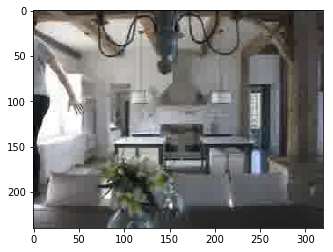

In [33]:
name = names_filter[9]
image_filter = io.imread(os.path.join('/home/windward/gcy/Golf/proj/data/SURREAL/summary/image/', name))
plt.imshow(image_filter)
plt.show()

In [37]:
names_filter[-2:]

['run0_105_20_c0011_frame0099.jpg', 'run0_105_20_c0011_frame0100.jpg']

# 检查train val test的重复性
train的文件夹与val, test都不一样，但val中的文件夹在test中都有（文件夹指run0/1/2中按照日期命名的文件夹）
进一步验证，val是test的子集

In [91]:
import os

In [103]:
train_path = '../../data/SURREAL/data/cmu/train/run0'
val_path = '../../data/SURREAL/data/cmu/val/run0'
test_path = '../../data/SURREAL/data/cmu/test/run1'

In [104]:
train_dir = os.listdir(train_path)    # 1964  1964  1964
print(len(train_run0_dir))
val_dir = os.listdir(val_path)    # 173  170  164
print(len(val_run0_dir))
test_dir = os.listdir(test_path)    # 703  703  703
print(len(test_rum0_dir))

1964
173
703


In [105]:
sorted(test_dir)

['03_01',
 '03_02',
 '03_03',
 '03_04',
 '06_01',
 '06_03',
 '06_04',
 '06_05',
 '06_06',
 '06_07',
 '06_08',
 '06_09',
 '06_10',
 '06_11',
 '06_12',
 '06_14',
 '06_15',
 '09_01',
 '09_02',
 '09_03',
 '09_04',
 '09_05',
 '09_06',
 '09_07',
 '09_08',
 '09_09',
 '09_10',
 '09_11',
 '09_12',
 '104_02',
 '104_03',
 '104_04',
 '104_06',
 '104_07',
 '104_08',
 '104_09',
 '104_10',
 '104_11',
 '104_12',
 '104_13',
 '104_14',
 '104_15',
 '104_16',
 '104_17',
 '104_19',
 '104_20',
 '104_21',
 '104_22',
 '104_23',
 '104_24',
 '104_25',
 '104_26',
 '104_27',
 '104_29',
 '104_30',
 '104_31',
 '104_32',
 '104_33',
 '104_34',
 '104_35',
 '104_36',
 '104_37',
 '104_38',
 '104_39',
 '104_40',
 '104_41',
 '104_42',
 '104_43',
 '104_44',
 '104_45',
 '104_46',
 '104_47',
 '104_49',
 '104_50',
 '104_51',
 '104_52',
 '104_53',
 '104_54',
 '104_56',
 '104_57',
 '107_01',
 '107_02',
 '107_03',
 '107_04',
 '107_06',
 '107_07',
 '107_08',
 '107_09',
 '107_10',
 '107_11',
 '107_12',
 '107_13',
 '107_14',
 '108_

In [67]:
#求差集，在val中但不在train中， val中的文件夹都不在train中
val_not_train = list(set(val_dir).difference(set(train_dir)))    # 173  170  164
print(len(val_not_train))

173


In [68]:
#求差集，在val中但不在test中，val中的文件夹都在test中
val_not_test = list(set(val_dir).difference(set(test_dir)))    # 0  0  0
print(len(val_not_test))

0


In [82]:
val_file_path = os.path.join(val_path, val_dir[0])
print(val_file_path)
test_file_path = os.path.join(test_path, val_dir[0])
print(test_file_path)

../../data/SURREAL/data/cmu/val/run0/108_21
../../data/SURREAL/data/cmu/test/run0/108_21


In [83]:
val_file = os.listdir(val_file_path)
print(val_file)

['108_21_c0002_depth.mat', '108_21_c0002_info.mat', '108_21_c0002.mp4', '108_21_c0002_gtflow.mat', '108_21_c0002_segm.mat']


In [84]:
test_file = os.listdir(test_file_path)
print(test_file)

['108_21_c0002_depth.mat', '108_21_c0001_segm.mat', '108_21_c0001_info.mat', '108_21_c0002_info.mat', '108_21_c0002.mp4', '108_21_c0002_gtflow.mat', '108_21_c0002_segm.mat', '108_21_c0001_depth.mat', '108_21_c0001.mp4', '108_21_c0001_gtflow.mat']
